<a href="https://colab.research.google.com/github/okwasna/dane_wszystkie/blob/main/dane_wszystkie12.10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler


In [3]:


file_path = 'summary_htseq_norm2.xlsx'
df = pd.read_excel(file_path, sheet_name='summary_htseq')

print(f"Liczba genów przed filtrowaniem: {len(df)}")

mean_before_filtering = df['var'].mean()
variance_before_filtering = df['var'].var()

print(f"Średnia wariancji przed filtrowaniem: {mean_before_filtering}")
print(f"Wariancja przed filtrowaniem: {variance_before_filtering}")

variance_threshold = 10

df_filtered = df[df['var'] >= variance_threshold]

mean_after_filtering = df_filtered['var'].mean()
variance_after_filtering = df_filtered['var'].var()

print(f"Średnia wariancji po filtrowaniu: {mean_after_filtering}")
print(f"Wariancja po filtrowaniu: {variance_after_filtering}")

initial_counts = df['lncRNA'].value_counts()

filtered_counts = df_filtered['lncRNA'].value_counts()

removed_counts = initial_counts - filtered_counts

removed_0 = removed_counts.get(0, 0)
removed_1 = removed_counts.get(1, 0)

print(f"Liczba genów usuniętych z lncRNA = 0: {removed_0}")
print(f"Liczba genów usuniętych z lncRNA = 1: {removed_1}")

total_genes_after_filtering = len(df_filtered)
print(f"Łączna liczba genów po filtrowaniu: {total_genes_after_filtering}")

Liczba genów przed filtrowaniem: 28677
Średnia wariancji przed filtrowaniem: 83837021.10925484
Wariancja przed filtrowaniem: 1.4257388777828288e+20
Średnia wariancji po filtrowaniu: 108068243.92073244
Wariancja po filtrowaniu: 1.837809291273408e+20
Liczba genów usuniętych z lncRNA = 0: 3473
Liczba genów usuniętych z lncRNA = 1: 2957
Łączna liczba genów po filtrowaniu: 22247


In [4]:
print(f"Liczba próbek (kolumn) branych pod uwagę do klastrowania: {df_filtered.shape[1]}")
print(f"Liczba genów (wierszy) branych pod uwagę po wybraniu próbek do klastrowania: {df_filtered.shape[0]}")


Liczba próbek (kolumn) branych pod uwagę do klastrowania: 31
Liczba genów (wierszy) branych pod uwagę po wybraniu próbek do klastrowania: 22247


In [11]:
data_values = df_filtered.loc[:, 'SRR7451446':]
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_values)

n_clusters = 40
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_normalized)

df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_

silhouette_avg = silhouette_score(data_normalized, kmeans.labels_)
print(f"Średni wskaźnik Silhouette dla {n_clusters} klastrów: {silhouette_avg:.4f}")

silhouette_values = silhouette_samples(data_normalized, kmeans.labels_)

df_filtered['Silhouette'] = silhouette_values
cluster_silhouette_means = df_filtered.groupby(f'Cluster_{n_clusters}')['Silhouette'].mean()

print(f"Średni wskaźnik Silhouette dla każdego klastra:")
print(cluster_silhouette_means)

cluster_counts = df_filtered[f'Cluster_{n_clusters}'].value_counts()
print(f"Ilość genów w każdym klastrze dla {n_clusters} klastrów:")
print(cluster_counts)

print(f"Całkowita liczba genów przypisanych do klastrów: {len(df_filtered)}")

<ipython-input-11-530b2661a680>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 40 klastrów: 0.8990
Średni wskaźnik Silhouette dla każdego klastra:
Cluster_40
0     0.978404
1     0.000000
2     0.000000
3     0.578045
4     0.360529
5     0.877543
6     0.112581
7     0.000000
8     0.000000
9     0.521364
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.144651
15    0.000000
16   -0.018405
17    0.924782
18    0.000000
19    0.000000
20    0.090473
21    0.000000
22    0.000000
23    0.749835
24    0.068368
25    0.205761
26    0.882243
27    0.000000
28    0.000000
29    0.000000
30   -0.054974
31    0.549515
32    0.000000
33    0.159813
34    0.000000
35    0.022568
36    0.305083
37    0.562426
38    0.352325
39   -0.116340
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 40 klastrów:
Cluster_40
0     16139
5      2531
3       962
36      549
17      474
9       417
23      358
31      246
37      176
38      103
14       78
26       61
16       35
6        34
30       27
24       13
20     

<ipython-input-11-530b2661a680>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


In [12]:
#k-means 30-50 co 5,
data_values = df_filtered.loc[:, 'SRR7451446':]
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_values)

cluster_ranges = range(30, 55, 5)

for n_clusters in cluster_ranges:
    print(f"\nKMeans dla {n_clusters} klastrów:")

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_normalized)

    df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_

    silhouette_avg = silhouette_score(data_normalized, kmeans.labels_)
    print(f"Średni wskaźnik Silhouette dla {n_clusters} klastrów: {silhouette_avg:.4f}")

    silhouette_values = silhouette_samples(data_normalized, kmeans.labels_)

    df_filtered['Silhouette'] = silhouette_values

    cluster_silhouette_means = df_filtered.groupby(f'Cluster_{n_clusters}')['Silhouette'].mean()

    print(f"Średni wskaźnik Silhouette dla każdego klastra:")
    print(cluster_silhouette_means)

    cluster_counts = df_filtered[f'Cluster_{n_clusters}'].value_counts()
    print(f"Ilość genów w każdym klastrze dla {n_clusters} klastrów:")
    print(cluster_counts)

print(f"Całkowita liczba genów przypisanych do klastrów: {len(df_filtered)}")


KMeans dla 30 klastrów:


<ipython-input-12-3511ca5b3b72>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 30 klastrów: 0.8985


<ipython-input-12-3511ca5b3b72>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_30
0     0.959116
1     0.000000
2     0.000000
3     0.604525
4     0.881996
5     0.000000
6     0.072434
7     0.578993
8     0.000000
9     0.150273
10    0.611075
11    0.727932
12    0.171593
13    0.000000
14    0.000000
15    0.470495
16    0.000000
17    0.000000
18    0.000000
19    0.391534
20    0.206923
21    0.929676
22    0.000000
23    0.000000
24    0.049043
25    0.033340
26    0.000000
27    0.000000
28    0.000000
29   -0.006780
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 30 klastrów:
Cluster_30
0     16139
4      2531
11      962
3       730
21      471
7       418
10      414
15      343
19       78
29       39
24       39
12       34
9        15
25       12
6         6
20        2
14        1
27        1
22        1
17        1
26        1
5         1
1         1
2         1
18        1
8         1
23        1
13        1
16        1
28        1
Name: count, dtype: int64

KMeans dla 35

<ipython-input-12-3511ca5b3b72>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 35 klastrów: 0.8948


<ipython-input-12-3511ca5b3b72>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_35
0     0.959116
1     0.000000
2     0.000000
3     0.473373
4     0.881996
5     0.000000
6     0.242162
7     0.588080
8     0.000000
9     0.080721
10    0.601970
11    0.727528
12    0.169039
13    0.000000
14    0.000000
15    0.431656
16    0.000000
17    0.000000
18    0.000000
19    0.362288
20    0.175641
21    0.929676
22    0.000000
23    0.000000
24    0.137458
25    0.094332
26    0.000000
27    0.000000
28    0.000000
29    0.109250
30    0.286630
31    0.122955
32    0.000000
33    0.614782
34    0.000000
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 35 klastrów:
Cluster_35
0     16139
4      2531
11      962
3       569
21      471
7       415
10      414
15      343
33      161
19       78
24       40
29       35
12       34
9        16
25       11
6         5
30        3
31        2
20        2
14        1
1         1
16        1
13        1
23        1
8         1
18        1
2         1
5

<ipython-input-12-3511ca5b3b72>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 40 klastrów: 0.8922


<ipython-input-12-3511ca5b3b72>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_40
0     0.959116
1     0.000000
2     0.000000
3     0.506473
4     0.881996
5     0.000000
6     0.359472
7     0.588029
8     0.000000
9     0.209917
10    0.601270
11    0.727528
12    0.219325
13    0.000000
14    0.000000
15    0.418494
16    0.000000
17    0.000000
18    0.000000
19    0.148473
20    0.000000
21    0.929676
22    0.000000
23    0.000000
24    0.170942
25   -0.099831
26    0.000000
27    0.000000
28    0.000000
29    0.079276
30    0.279189
31    0.120816
32    0.000000
33    0.570574
34    0.000000
35    0.152361
36    0.000000
37    0.167953
38   -0.016890
39    0.060128
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 40 klastrów:
Cluster_40
0     16139
4      2531
11      962
21      471
3       441
7       415
10      414
15      343
33      155
37      134
24       44
39       39
19       35
12       33
29       31
9        12
25       10
38        8
6         4
35        3
30        

<ipython-input-12-3511ca5b3b72>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 45 klastrów: 0.8948


<ipython-input-12-3511ca5b3b72>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_45
0     0.959116
1     0.000000
2     0.000000
3     0.514079
4     0.881996
5     0.000000
6     0.063262
7     0.588029
8     0.000000
9     0.188946
10    0.711174
11    0.727528
12    0.219325
13    0.000000
14    0.000000
15    0.418478
16    0.000000
17    0.000000
18    0.000000
19    0.148473
20    0.000000
21    0.925592
22    0.000000
23    0.000000
24    0.170942
25    0.004366
26    0.000000
27    0.000000
28    0.000000
29    0.091708
30    0.279343
31    0.117748
32    0.000000
33    0.569173
34    0.000000
35    0.240710
36    0.000000
37    0.164020
38    0.141237
39    0.060128
40    0.863366
41    0.398579
42    0.003688
43    0.347079
44    0.000000
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 45 klastrów:
Cluster_45
0     16139
4      2531
11      962
21      471
3       439
7       415
10      356
15      343
33      155
37      134
40       60
24       44
39       39
19       35
12     

<ipython-input-12-3511ca5b3b72>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 50 klastrów: 0.8935
Średni wskaźnik Silhouette dla każdego klastra:
Cluster_50
0     0.959116
1     0.000000
2     0.000000
3     0.514079
4     0.881996
5     0.000000
6     0.000000
7     0.587656
8     0.000000
9     0.178002
10    0.711174
11    0.727528
12    0.229695
13    0.000000
14    0.000000
15   -0.103928
16    0.000000
17    0.000000
18    0.000000
19    0.144915
20    0.000000
21    0.925592
22    0.000000
23    0.000000
24    0.169022
25    0.004366
26    0.000000
27    0.000000
28    0.000000
29    0.091708
30    0.259234
31    0.000000
32    0.000000
33    0.569173
34    0.000000
35    0.240710
36    0.000000
37    0.164020
38    0.141237
39    0.164979
40    0.863366
41    0.086079
42    0.003688
43    0.324328
44    0.000000
45    0.475686
46    0.290934
47    0.053201
48    0.000000
49    0.302855
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 50 klastrów:
Cluster_50
0     16139
4      2531
11      962
21      471
3

<ipython-input-12-3511ca5b3b72>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


In [6]:
cluster_0_genes = df_filtered[df_filtered[f'Cluster_{n_clusters}'] == 0]

print(f"Ilość genów w klastrze 0: {len(cluster_0_genes)}")


Ilość genów w klastrze 0: 16200


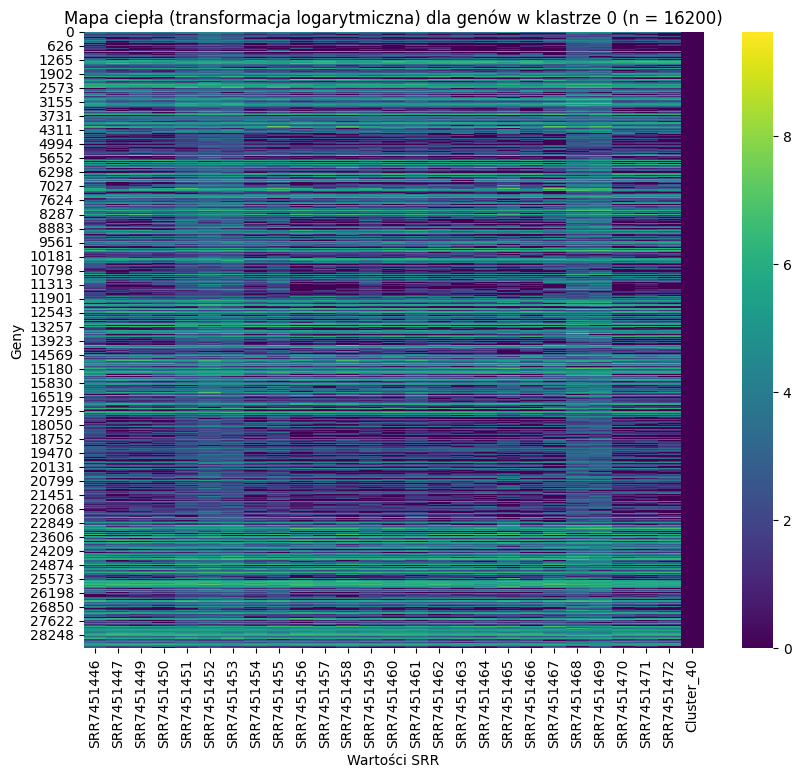

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_0_genes_log = np.log1p(cluster_0_genes.loc[:, 'SRR7451446':])

plt.figure(figsize=(10, 8))
sns.heatmap(cluster_0_genes_log, cmap="viridis", cbar=True)
plt.title(f"Mapa ciepła (transformacja logarytmiczna) dla genów w klastrze 0 (n = {len(cluster_0_genes)})")
plt.xlabel("Wartości SRR")
plt.ylabel("Geny")
plt.show()


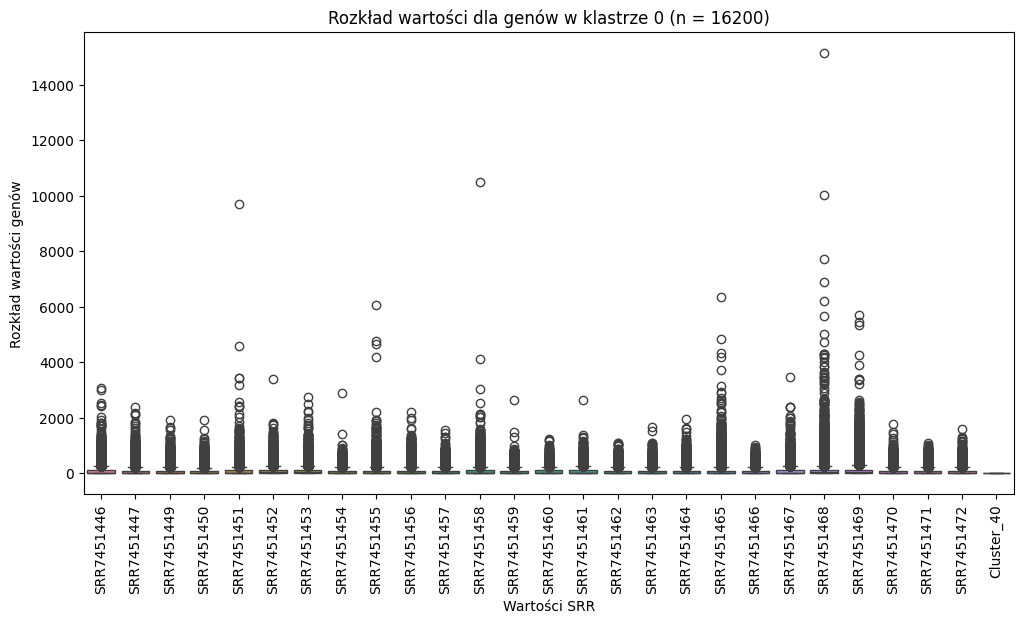

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cluster_0_genes.loc[:, 'SRR7451446':])
plt.title(f"Rozkład wartości dla genów w klastrze 0 (n = {len(cluster_0_genes)})")
plt.xlabel("Wartości SRR")
plt.ylabel("Rozkład wartości genów")
plt.xticks(rotation=90)
plt.show()


In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

agg_clustering = AgglomerativeClustering(n_clusters=40)
agg_labels = agg_clustering.fit_predict(data_normalized)

df_filtered.loc[:, 'Agg_Cluster_40'] = agg_labels

agg_silhouette_avg = silhouette_score(data_normalized, agg_labels)
print(f"Średni wskaźnik Silhouette dla Agglomerative Clustering (40 klastrów): {agg_silhouette_avg:.4f}")


agg_cluster_counts = pd.Series(agg_labels).value_counts()
print(f"Ilość genów w każdym klastrze dla Agglomerative Clustering (40 klastrów):")
print(agg_cluster_counts)


<ipython-input-9-240c6fac1cb1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Agg_Cluster_40'] = agg_labels


Średni wskaźnik Silhouette dla Agglomerative Clustering (40 klastrów): 0.6482
Ilość genów w każdym klastrze dla Agglomerative Clustering (40 klastrów):
10    16610
28     2602
19     1321
22      714
7       387
9       265
5       156
0        96
1        26
8         9
15        8
18        6
2         6
6         5
4         4
13        3
14        3
17        3
3         2
39        1
33        1
36        1
35        1
23        1
16        1
27        1
12        1
26        1
29        1
20        1
31        1
25        1
24        1
30        1
32        1
38        1
21        1
37        1
34        1
11        1
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import DBSCAN

dbscan_clustering = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan_clustering.fit_predict(data_normalized)

df_filtered.loc[:, 'DBSCAN_Cluster'] = dbscan_labels

dbscan_cluster_counts = pd.Series(dbscan_labels).value_counts()
print(f"Ilość genów w każdym klastrze dla DBSCAN:")
print(dbscan_cluster_counts)

if len(set(dbscan_labels)) > 1 and -1 not in dbscan_labels:
    dbscan_silhouette_avg = silhouette_score(data_normalized, dbscan_labels)
    print(f"Średni wskaźnik Silhouette dla DBSCAN: {dbscan_silhouette_avg:.4f}")
else:
    print("Nie można obliczyć wskaźnika Silhouette dla DBSCAN (za mało klastrów lub obecność outlierów).")


Ilość genów w każdym klastrze dla DBSCAN:
 0    16200
 2     2318
 1     1978
 3      639
-1      531
 5      437
 4      144
Name: count, dtype: int64
Nie można obliczyć wskaźnika Silhouette dla DBSCAN (za mało klastrów lub obecność outlierów).


<ipython-input-14-bbbb4f961d23>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'DBSCAN_Cluster'] = dbscan_labels
